In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dataclosed = sio.loadmat('DataOpen.mat')
data_c = np.array(dataclosed['DataOpen'])

In [2]:
COLUMN_NAMES=np.arange(183)
df = pd.DataFrame(columns=COLUMN_NAMES)
for i in range(len(data_c)):
    df.loc[i] = (np.mean(data_c[i][:], axis = 0))

In [4]:
data_5_bins = pd.DataFrame(columns = ['delta', 'theta', 'alpha', 'betta', 'gamma'])
for i in range(len(data_c)):
    gamma = np.mean(df.loc[i][60:183])
    betta = np.mean(df.loc[i][24:60])
    alpha = np.mean(df.loc[i][16:24])
    theta = np.mean(df.loc[i][8:16])
    delta = np.mean(df.loc[i][1:8])
    data_5_bins = data_5_bins.append({'delta': delta, 'theta': theta, 'alpha': alpha, 'betta': betta, 'gamma': gamma}, ignore_index=True)

In [5]:
data_5_bins.head()

,delta,theta,alpha,betta,gamma
0,27.533183,22.901885,22.409717,17.002627,9.402905
1,28.392650,26.396671,24.683261,16.556961,11.548863
2,26.661089,23.759141,21.618937,16.127897,11.291288
3,29.198806,25.349194,21.409841,16.148411,10.631394
4,28.925799,25.014359,25.388946,17.257047,12.314147


Instead of 183 dimentions we have only 6 features

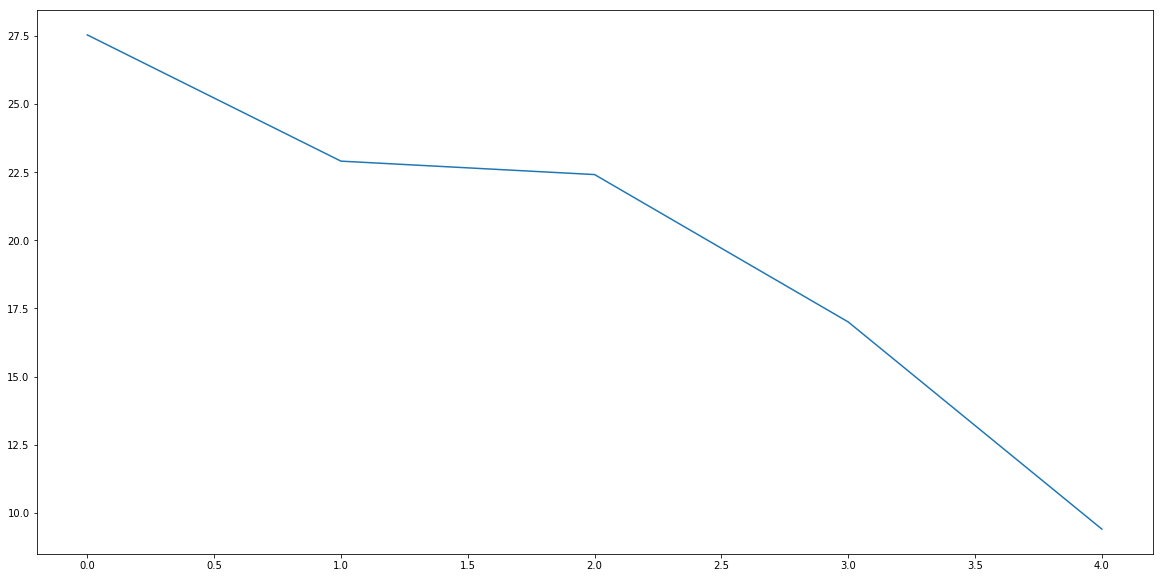

In [6]:
yaxis = data_5_bins.loc[0]
xaxis = np.arange(0, 5)
plt.figure(figsize=(20,10))
plt.plot(xaxis, yaxis)
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.000s...
[t-SNE] Computed neighbors for 289 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 1.954033
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.101131
[t-SNE] Error after 1200 iterations: 0.471026


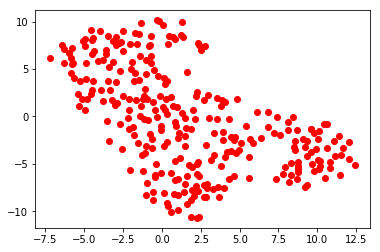

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000)
tsne_results = tsne.fit_transform(data_5_bins)
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

plt.plot(df_tsne['x-tsne'], df_tsne['y-tsne'], 'ro')
plt.show()

In [9]:
classes = pd.read_csv("classes.csv", header=None)
classes.columns = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuriticism']
df_openness = pd.concat([data_5_bins, classes['Openness']], axis = 1)

In [10]:
classes.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuriticism
0,0,1,1,0,0
1,0,1,0,0,1
2,0,1,1,1,1
3,1,1,0,1,1
4,1,1,0,1,0


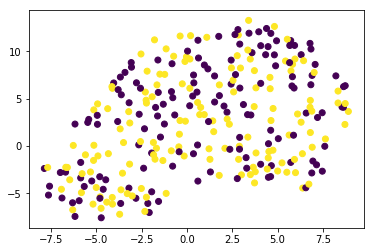

In [12]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=classes['Conscientiousness'])
plt.show()

Attempt to predict one of the personality traits by RandomForestClassifier

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(data_5_bins, classes['Openness'], test_size=0.25, random_state=0)
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(pred, y_test))

The next X dataset was constructed by avaraging all 32 electrodes for each frequency

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df, classes['Openness'], test_size=0.1, random_state=1)
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(pred, y_test))

And the third and last X dataset consists of all 183 frequencies by 32 electrodes.

In [13]:
data_closed_full = pd.read_csv("dataclose.csv", header = None)
data_closed_full.head()

,0,1,2,3,4,5,6,7,8,9,...,5846,5847,5848,5849,5850,5851,5852,5853,5854,5855
0,35.942,33.397,31.355,33.491,34.742,32.209,33.966,33.521,34.135,32.324,...,3.4058,9.1046,4.8430,4.5199,4.3930,3.3112,5.0201,7.4857,4.3545,4.3392
1,34.182,35.186,41.350,33.687,33.199,32.931,32.379,32.328,33.617,36.060,...,12.4400,12.8460,12.4630,12.7110,12.6550,12.6420,11.8020,12.5340,12.9000,13.3080
2,29.636,32.321,34.499,36.403,31.697,32.330,32.849,32.346,32.558,36.200,...,7.9314,7.6813,7.3494,7.9808,8.0032,6.7964,7.3225,8.2333,8.2407,8.8856
3,34.835,34.462,32.681,33.867,34.433,33.734,31.998,34.530,34.736,32.555,...,5.8883,6.5028,5.4125,4.8480,4.4507,6.4637,5.1477,4.3411,4.8976,6.0552
4,33.527,33.212,31.959,33.176,34.559,32.852,30.661,34.364,35.579,33.454,...,11.2440,12.2780,11.2760,10.6880,10.4850,11.4320,12.1050,12.0260,10.9710,11.2120


After some experiments with perplexity parametr and other setting parameters there is still no clear separation for groups

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.074s...
[t-SNE] Computed neighbors for 289 samples in 1.720s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 43.541299
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.133362
[t-SNE] Error after 5000 iterations: 1.037074


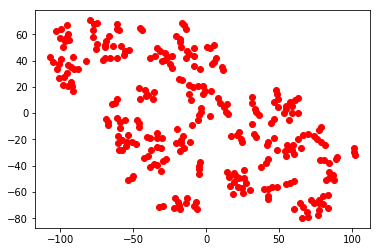

In [7]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000)
tsne_results = tsne.fit_transform(data_closed_full)
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

plt.plot(df_tsne['x-tsne'], df_tsne['y-tsne'], 'ro')
plt.show()

There are some version of PCA impementation in python

[ 0.43330354  0.12930056]


Text(0.5,1,'Principal component analysis')

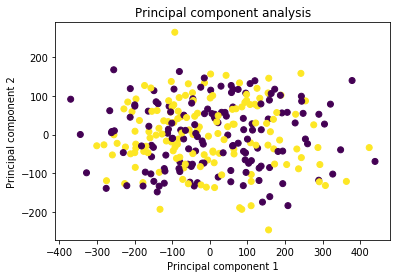

In [9]:
classes = pd.read_csv("classes.csv", header=None)
classes.columns = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuriticism']

pca_model = PCA(n_components=2, svd_solver = 'arpack')
#svd_solver : string {‘auto’, ‘full’, ‘arpack’, ‘randomized’}

#pca_model = KernelPCA(n_components=2, kernel='poly', degree=3, eigen_solver='auto')
#kernel : “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed

pca_model.fit(data_closed_full)
print(pca_model.explained_variance_ratio_)  
pca_data = pd.DataFrame(data = pca_model.transform(data_closed_full)
             , columns = ['principal component 1', 'principal component 2'])

pca_data = pd.concat([pca_data, classes], axis = 1)
plt.scatter(pca_data['principal component 1'], pca_data['principal component 2'], c=pca_data['Agreeableness'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Principal component analysis')

One of the possible ways to increase the eficient of algorithm is adding normalized data (as it is done below)

In [134]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)
x_5 = StandardScaler().fit_transform(data_5_bins)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 289 samples in 0.000s...
[t-SNE] Computed neighbors for 289 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 0.892404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.972141
[t-SNE] Error after 1050 iterations: 0.530352


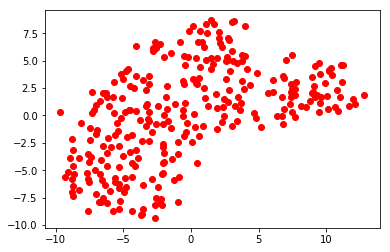

In [137]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000)
tsne_results = tsne.fit_transform(x_5)
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

plt.plot(df_tsne['x-tsne'], df_tsne['y-tsne'], 'ro')
plt.show()